# Sox9 impact of cell anisotropy analysis

In [35]:
# HIDE CODE

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import functions


In [37]:
# HIDE CODE
tau = 0.25          # weight threshold
boxSize = 128       # window pixel size
overlap = 0.5       # window overlap
pixelSize = 0.313   # pixel size

## Load analysis csv
path = r'../data/'
df = pd.read_csv(os.path.join(path, 'quantification.csv'))
df['Distance'] = df['Distance'] * (boxSize * overlap) * pixelSize
df['SymAngleDeg'] = df['SymAngle'].transform(np.rad2deg)

df.head()

Unnamed: 0 Phenotype  Animal  ...    Weight  Distance Align  SymAngleDeg
0           0        wt  wt0_sg  ...  0.000000             NaN    15.654647
1           1        wt  wt0_sg  ...  0.881893             NaN    63.584155
2           2        wt  wt0_sg  ...  1.000000             NaN    89.271821
3           3        wt  wt0_sg  ...  0.020828             NaN     9.307441
4           4        wt  wt0_sg  ...  0.997396             NaN    52.169964

[5 rows x 12 columns]

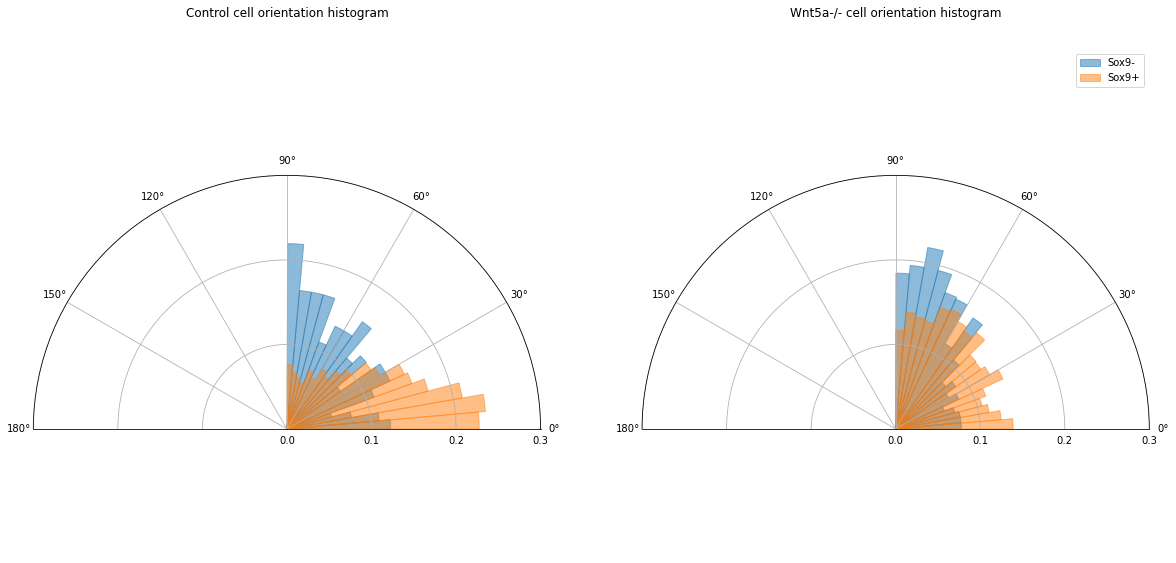

In [38]:
# HIDE CODE

wt_ind = df['Phenotype'] == 'wt'
mu_ind = df['Phenotype'] == 'mu'
r2_ind = df['Area'] == 2
r1_ind = df['Area'] == 1
ar_ind = df['Weight'] >= tau

fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize=(20,10))
functions.rose_plot(ax[0], df.loc[wt_ind & r1_ind & ar_ind, 'SymAngle'].values, bins=18, fill=True, alpha=0.5, density=True, color='C0')
functions.rose_plot(ax[0], df.loc[wt_ind & r2_ind & ar_ind, 'SymAngle'].values, bins=18, fill=True, alpha=0.5, density=True, color='C1')
functions.rose_plot(ax[1], df.loc[mu_ind & r1_ind & ar_ind, 'SymAngle'].values, bins=18, fill=True, alpha=0.5, density=True, color='C0')
functions.rose_plot(ax[1], df.loc[mu_ind & r2_ind & ar_ind, 'SymAngle'].values, bins=18, fill=True, alpha=0.5, density=True, color='C1')
ax[0].set(title="Control cell orientation histogram")
ax[1].set(title="$Wnt5a^{-/-}$ cell orientation histogram")
ax[1].legend(('Sox9-', 'Sox9+'))